In [87]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from pprint import pprint
import json
import os
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
api_key = "26fffe78004735d07d1bfae8bd4f849d"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [56]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

584

In [64]:
city = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

records = 1

print('Beginning Data Retrieval')
print('------------------------------')

for citi in cities:
    url = f"http://api.openweathermap.org/data/2.5/weather?q={citi}&appid={api_key}&units=imperial"
    response = requests.get(url).json()
    time.sleep(1)
    
    try:
        city.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        print(f"processing record {records} | {citi}")
        records += 1
   
    except KeyError:
        print('city not found, next city...')


Beginning Data Retrieval
------------------------------
processing record 1 | itarema
processing record 2 | vaini
processing record 3 | tabas
processing record 4 | broken hill
city not found, next city...
processing record 5 | marsabit
processing record 6 | oranjemund
processing record 7 | norman wells
processing record 8 | saint-philippe
processing record 9 | nome
processing record 10 | atuona
processing record 11 | yellowknife
processing record 12 | hualmay
processing record 13 | abeche
processing record 14 | kavaratti
processing record 15 | punta arenas
processing record 16 | souillac
processing record 17 | hambantota
processing record 18 | faya
processing record 19 | ahipara
processing record 20 | san quintin
processing record 21 | rikitea
processing record 22 | saint george
processing record 23 | jamestown
processing record 24 | port elizabeth
processing record 25 | bluff
city not found, next city...
city not found, next city...
processing record 26 | coria
processing record 27 | 

processing record 226 | nizhneudinsk
processing record 227 | buin
processing record 228 | mahebourg
processing record 229 | billings
processing record 230 | omboue
processing record 231 | anloga
processing record 232 | zapolyarnyy
city not found, next city...
city not found, next city...
processing record 233 | mount isa
processing record 234 | noshiro
processing record 235 | uchiza
processing record 236 | port hedland
processing record 237 | cidreira
processing record 238 | cape town
processing record 239 | ferrol
processing record 240 | bojnurd
processing record 241 | sialkot
processing record 242 | dolinsk
processing record 243 | hasaki
processing record 244 | hailey
processing record 245 | okato
processing record 246 | lata
processing record 247 | wyoming
city not found, next city...
processing record 248 | baruun-urt
processing record 249 | fort nelson
processing record 250 | vanino
processing record 251 | winburg
processing record 252 | porto santo
processing record 253 | san cri

processing record 453 | kulhudhuffushi
processing record 454 | concordia
processing record 455 | comodoro rivadavia
processing record 456 | tura
processing record 457 | goderich
processing record 458 | pedroso
processing record 459 | bukama
processing record 460 | magdagachi
processing record 461 | los llanos de aridane
processing record 462 | vao
processing record 463 | maraba
processing record 464 | vikhorevka
processing record 465 | sokoto
processing record 466 | conakry
processing record 467 | trincomalee
processing record 468 | inndyr
processing record 469 | la roche-sur-yon
processing record 470 | mankato
processing record 471 | port-gentil
processing record 472 | takaka
processing record 473 | serenje
city not found, next city...
processing record 474 | maceio
processing record 475 | ucluelet
processing record 476 | filadelfia
processing record 477 | wewak
processing record 478 | boyuibe
processing record 479 | pinhao
processing record 480 | constitucion
processing record 481 | 

In [73]:
# Create a Dataframe from city data 

city_weather_df = pd.DataFrame({'City Name': city, 'Latitude': lat, 'Longitude': lng, 
                          'Max Temperature': max_temp, 'Humidity': humidity, 'Cloudiness': cloudiness, 
                          'Wind Speed': wind_speed, 'Country': country, 'Date': date}) 

city_weather_df.head()


,City Name,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Itarema,-2.9248,-39.9167,79.30,76,11,12.26,BR,1610244700
1,Vaini,-21.2000,-175.2000,84.20,84,75,8.05,TO,1610244702
2,Tabas,33.5959,56.9244,28.40,37,0,2.30,IR,1610244703
3,Broken Hill,-31.9500,141.4333,86.00,23,0,8.05,AU,1610244704
4,Marsabit,2.3284,37.9899,66.31,49,6,8.99,KE,1610244706


In [75]:
# Drop anything with humidity over 100, FInd indices of these cities
# When this runs we see there are 0 cities with humidity over 100

humidity_over_100 = city_weather_df.loc[weather_df["Humidity"] > 100]

humidity_over_100.count()

City Name          0
Latitude           0
Longitude          0
Max Temperature    0
Humidity           0
Cloudiness         0
Wind Speed         0
Country            0
Date               0
dtype: int64

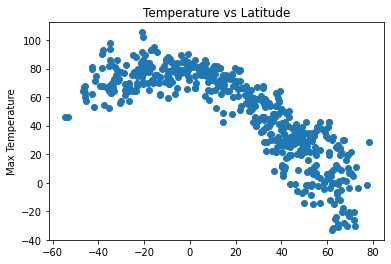

In [110]:
# Lattitude Vs Temperature Graph

plt.scatter(city_weather_df["Latitude"], city_weather_df["Max Temperature"])
plt.title("Temperature vs Latitude")
plt.ylabel("Max Temperature")
plt.savefig("../output_data/Temp_vs_Lat.png")
plt.show()
    

From the scatter plot, you can see that the closer a city is to the equator at Lat=0, usually the higher the temperature of the city.  As the cities move further away from Lat = 0, the temperatures tend to get colder. 


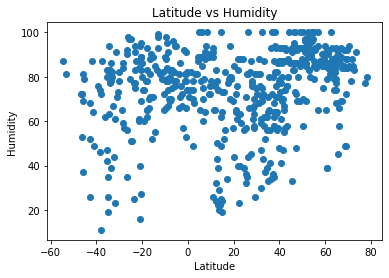

In [118]:
# Lattitude vs. Humidity

plt.scatter(city_weather_df["Latitude"], city_weather_df["Humidity"])
plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("../output_data/Humidity_vs_Lat.png")
plt.show()

This scatterplot is analyzing Humidity vs Latitude and if there is any relationship.  This code is showing that Latitude does not have much of a correlation with Humidity as you can see the dots are all over.

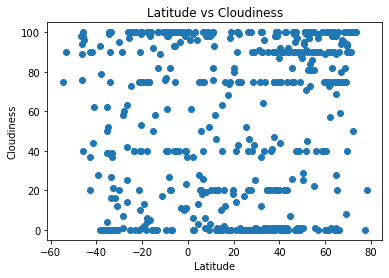

In [119]:
# Lattitude vs Cloudiness

plt.scatter(city_weather_df["Latitude"], city_weather_df["Cloudiness"])
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("../output_data/Cloudiness_vs_Lat.png")
plt.show()

This scatterplot is analyzing Cloudiness vs Latitude and if there is any relationship.  This code is showing that Latitude does not have much of a correlation with Cloudiness as you can see the dots are all over again.

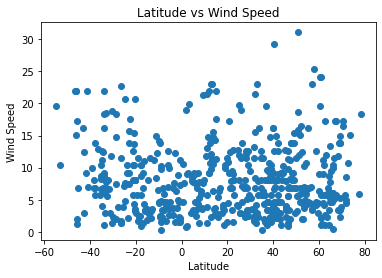

In [121]:
# Lattitude vs Wind Speed

plt.scatter(city_weather_df["Latitude"], city_weather_df["Wind Speed"])
plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("../output_data/Wind_vs_Lat.png")
plt.show()

This scatterplot is analyzing Wind Speed vs Latitude and if there is any relationship.  This code is showing that Latitude does not have much of a correlation with Cloudiness as you can see the dots are all over again.

# Linear Regression

In [122]:
# Northern Hemisphere Data 

northern_hemi = city_weather_df[city_weather_df["Latitude"] >= 0]

northern_hemi

,City Name,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
2,Tabas,33.5959,56.9244,28.40,37,0,2.30,IR,1610244703
4,Marsabit,2.3284,37.9899,66.31,49,6,8.99,KE,1610244706
6,Norman Wells,65.2820,-126.8329,1.40,92,20,5.75,CA,1610244758
8,Nome,64.5011,-165.4064,-11.20,77,1,3.44,US,1610244696
10,Yellowknife,62.4560,-114.3525,9.00,85,1,5.75,CA,1610244762
...,...,...,...,...,...,...,...,...,...
525,Wanlaweyn,2.6185,44.8938,70.11,68,0,9.19,SO,1610245596
526,Mahon,39.8885,4.2658,51.80,71,20,9.22,ES,1610245597
527,Penzance,50.1186,-5.5371,35.01,100,25,6.91,GB,1610245598
528,Vila Franca do Campo,37.7167,-25.4333,53.60,58,75,4.61,PT,1610245599


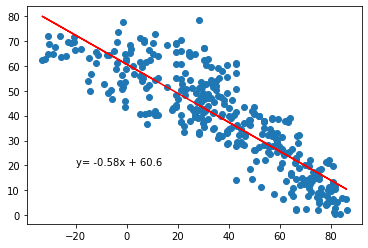

Relationship: The correlation between Max Temperature and Latitude in northern hemi is -0.87


In [123]:
# Graph Northern Hem Lat vs Temp

x = northern_hemi["Max Temperature"]
y = northern_hemi["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept, 2))

plt.scatter(x,y)
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, (-20,20))
plt.savefig("../output_data/NH_Temp_vs_Latitude_LinRegress.png")
plt.show()

correlation = st.pearsonr(x,y)
print(f"Relationship: The correlation between Max Temperature and Latitude in northern hemi is {round(correlation[0],2)}")
    

In [124]:
# Graphing Southern Hempi Vs Latitude

southern_hemi = city_weather_df[city_weather_df["Latitude"] <= 0]

southern_hemi

    

,City Name,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Itarema,-2.9248,-39.9167,79.30,76,11,12.26,BR,1610244700
1,Vaini,-21.2000,-175.2000,84.20,84,75,8.05,TO,1610244702
3,Broken Hill,-31.9500,141.4333,86.00,23,0,8.05,AU,1610244704
5,Oranjemund,-28.5500,16.4333,61.75,86,1,14.70,NA,1610244708
7,Saint-Philippe,-21.3585,55.7679,75.20,60,0,5.75,RE,1610244759
...,...,...,...,...,...,...,...,...,...
494,Conceição do Castelo,-20.3683,-41.2439,69.10,95,100,3.49,BR,1610245558
507,Arica,-18.4750,-70.3042,69.80,78,0,2.30,CL,1610245466
513,Diamantino,-14.4086,-56.4461,75.31,85,58,2.75,BR,1610245578
516,Ambulu,-8.3450,113.6058,84.94,70,27,1.81,ID,1610245584


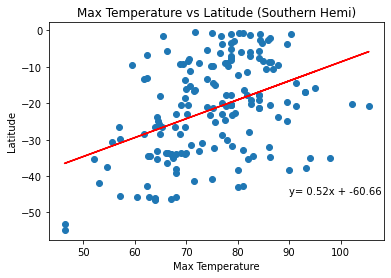

Relationship: The correlation between Max Temperature and Latitude in southern hemi is 0.41


In [125]:
# Southern hemi - Max Temp vs Latitude

x = southern_hemi["Max Temperature"]
y = southern_hemi["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept, 2))

plt.scatter(x,y)
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, (90,-45))
plt.title("Max Temperature vs Latitude (Southern Hemi)")
plt.xlabel("Max Temperature")
plt.ylabel("Latitude")
plt.savefig("../output_data/SH_Temp_vs_Latitude_LinRegress.png")
plt.show()

correlation = st.pearsonr(x,y)
print(f"Relationship: The correlation between Max Temperature and Latitude in southern hemi is {round(correlation[0],2)}")
    

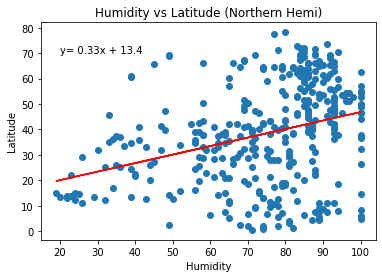

Relationship: The correlation between Humidity and Latitude in northern hemi is 0.32


In [126]:
# Northern Hemisphere - Humidity vs Latitude

x = northern_hemi["Humidity"]
y = northern_hemi["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept, 2))

plt.scatter(x,y)
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, (20,70))
plt.title("Humidity vs Latitude (Northern Hemi)")
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.savefig("../output_data/NH_Humidity_vs_Latitude_LinRegress.png")
plt.show()

correlation = st.pearsonr(x,y)
print(f"Relationship: The correlation between Humidity and Latitude in northern hemi is {round(correlation[0],2)}")
    

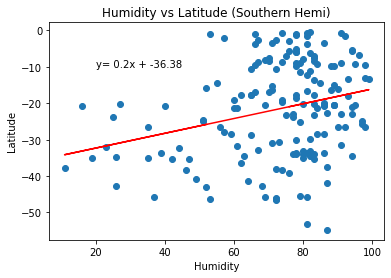

Relationship: The correlation between Humidity and Latitude in southern hemi is 0.28


In [127]:
# Southern Hemisphere - Humidity vs Latitude

x = southern_hemi["Humidity"]
y = southern_hemi["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept, 2))

plt.scatter(x,y)
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, (20,-10))
plt.title("Humidity vs Latitude (Southern Hemi)")
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.savefig("../output_data/SH_Humidity_vs_Latitude_LinRegress.png")
plt.show()

correlation = st.pearsonr(x,y)
print(f"Relationship: The correlation between Humidity and Latitude in southern hemi is {round(correlation[0],2)}")
    

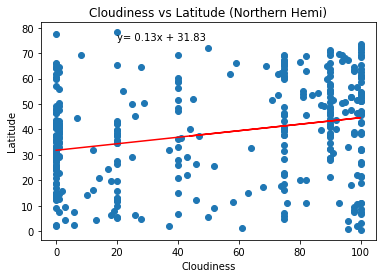

Relationship: The correlation between Cloudiness and Latitude in northern hemi is 0.27


In [128]:
# Northern Hemisphere - Cloudiness vs Latitude

x = northern_hemi["Cloudiness"]
y = northern_hemi["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept, 2))

plt.scatter(x,y)
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, (20,75))
plt.title("Cloudiness vs Latitude (Northern Hemi)")
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")
plt.savefig("../output_data/NH_Cloudiness_vs_Latitude_LinRegress.png")
plt.show()

correlation = st.pearsonr(x,y)
print(f"Relationship: The correlation between Cloudiness and Latitude in northern hemi is {round(correlation[0],2)}")
    

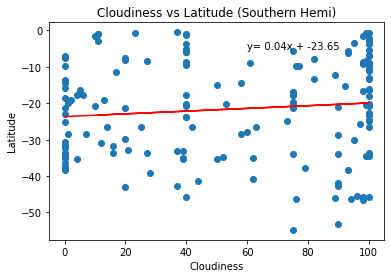

Relationship: The correlation between Cloudiness and Latitude in southern hemi is 0.11


In [129]:
# Southern Hemisphere - Cloudiness vs Latitude

x = southern_hemi["Cloudiness"]
y = southern_hemi["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept, 2))

plt.scatter(x,y)
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, (60,-5))
plt.title("Cloudiness vs Latitude (Southern Hemi)")
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")
plt.savefig("../output_data/SH_Cloudiness_vs_Latitude_LinRegress.png")
plt.show()

correlation = st.pearsonr(x,y)
print(f"Relationship: The correlation between Cloudiness and Latitude in southern hemi is {round(correlation[0],2)}")
    

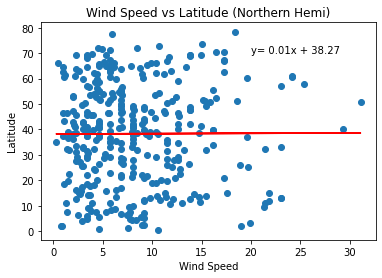

Relationship: The correlation between Wind Speed and Latitude in northern hemi is 0.0


In [130]:
# Northern Hemisphere - Wind Speed vs Latitude

x = northern_hemi["Wind Speed"]
y = northern_hemi["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept, 2))

plt.scatter(x,y)
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, (20,70))
plt.title("Wind Speed vs Latitude (Northern Hemi)")
plt.xlabel("Wind Speed")
plt.ylabel("Latitude")
plt.savefig("../output_data/NH_Wind_vs_Latitude_LinRegress.png")
plt.show()

correlation = st.pearsonr(x,y)
print(f"Relationship: The correlation between Wind Speed and Latitude in northern hemi is {round(correlation[0],2)}")
    

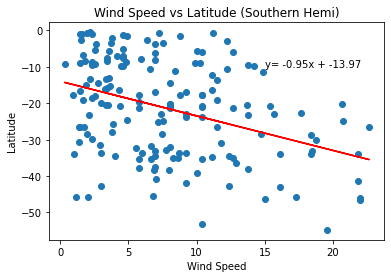

Relationship: The correlation between Wind Speed and Latitude in southern hemi is -0.39


In [132]:
# Southern Hemisphere - Wind Speed vs Latitude

x = southern_hemi["Wind Speed"]
y = southern_hemi["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept, 2))

plt.scatter(x,y)
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, (15,-10))
plt.title("Wind Speed vs Latitude (Southern Hemi)")
plt.xlabel("Wind Speed")
plt.ylabel("Latitude")
plt.savefig("../output_data/SH_Wind_vs_Latitude_LinRegress.png")
plt.show()

correlation = st.pearsonr(x,y)
print(f"Relationship: The correlation between Wind Speed and Latitude in southern hemi is {round(correlation[0],2)}")
    

In [135]:
# Output File (CSV)

output_file = "../output_data/cities.csv"
city_weather_df.to_csv(output_file, index= True, header= True)

#Read WeatherPy CSV file

cities_data = pd.read_csv(output_file)

cities_data.head()


,Unnamed: 0,City Name,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,Itarema,-2.9248,-39.9167,79.30,76,11,12.26,BR,1610244700
1,1,Vaini,-21.2000,-175.2000,84.20,84,75,8.05,TO,1610244702
2,2,Tabas,33.5959,56.9244,28.40,37,0,2.30,IR,1610244703
3,3,Broken Hill,-31.9500,141.4333,86.00,23,0,8.05,AU,1610244704
4,4,Marsabit,2.3284,37.9899,66.31,49,6,8.99,KE,1610244706
